Examples of Loading Term Structure (futures and spot vix indexes)

In [1]:
import vix_utils, pandas as pd, logging, asyncio,sys,matplotlib.pyplot as plt, scipy.stats as bc
from itertools import chain

In Jupyter, use the vix_utils asynchronous functions to the load the data
here we read the futures and spot term structure

In [2]:
vix_futures,vix_spot=await asyncio.gather(vix_utils.async_load_vix_term_structure(),vix_utils.async_get_vix_index_histories())

Duplicates detected
                     Trade Date  Weekly  Tenor_Monthly  Tenor_Days  \
16401 2013-01-02 00:00:00-05:00   False            1.0          14   
16402 2013-01-02 00:00:00-05:00   False            1.0          14   
16403 2013-01-02 00:00:00-05:00   False            2.0          42   
16404 2013-01-02 00:00:00-05:00   False            2.0          42   
16405 2013-01-02 00:00:00-05:00   False            3.0          76   
...                         ...     ...            ...         ...   
19988 2013-12-17 00:00:00-05:00   False            1.0           1   
39859 2020-02-27 00:00:00-05:00    True            2.0          26   
39860 2020-02-27 00:00:00-05:00    True            2.0          26   
39874 2020-02-28 00:00:00-05:00    True            2.0          25   
39875 2020-02-28 00:00:00-05:00    True            2.0          25   

       Tenor_Trade_Days                    Expiry   Open   High    Low  Close  \
16401              10.0 2013-01-16 00:00:00-05:00  16.80  

Another way, reading the futures, then the spot structure, in sequence instead of concurrently

In [3]:
vix_futures_skinny_2 = await vix_utils.async_load_vix_term_structure()
vix_spot_2=await vix_utils.async_get_vix_index_histories()

Another way to load the data, it won't work if you have a running event loop, 
like we do in Jupyter. If your project generally doesn't use asyncio, you can use these calls instead of the 
async_ calls to load the data.  Ignore the errors of the following cel.

In [4]:

try:
    vix_futures_skinny_3,vix_spot_3 = vix_utils.load_vix_term_structure(),vix_utils.get_vix_index_histories()
except Exception as e:
    print("use the api functions starting with async_ to load the term structure and vix index histories")

use the api functions starting with async_ to load the term structure and vix index histories


C:\Users\doug\AppData\Local\Temp\ipykernel_31492\3817485108.py:4: RuntimeWarning: coroutine 'async_load_vix_term_structure' was never awaited
  print("use the api functions starting with async_ to load the term structure and vix index histories")


In [5]:
#manipulate the data to get what we want to display
vix_spot_wide=vix_utils.pivot_spot_term_structure_on_symbol(vix_spot)
vix_futures_monthly_skinny=vix_utils.select_monthly_futures(vix_futures)
vix_futures_wide=vix_utils.pivot_futures_on_monthly_tenor(vix_futures_monthly_skinny)
vix_futures_wide=vix_utils.append_continuous_maturity_one_month(vix_futures_wide)
selected_tenors=[1,1.5,2,3,4,5,6]
original_vix_futures_wide=pd.DataFrame(vix_futures_wide)
vix_futures_wide=vix_futures_wide[selected_tenors]
vix_futures_wide




1.0                                                          \
            Change  Close     Expiry                           File   High   
Trade Date                                                                   
2004-03-26     NaN    NaN        NaT                            NaN    NaN   
2004-03-29     NaN    NaN        NaT                            NaN    NaN   
2004-03-30     NaN    NaN        NaT                            NaN    NaN   
2004-03-31     NaN    NaN        NaT                            NaN    NaN   
2004-04-01     NaN    NaN        NaT                            NaN    NaN   
...            ...    ...        ...                            ...    ...   
2024-01-26 -0.1088  14.14 2024-02-14  2024-02-14.w_.CFE_VX_2024.csv  14.45   
2024-01-29  0.1335  14.20 2024-02-14  2024-02-14.w_.CFE_VX_2024.csv  14.45   
2024-01-30 -0.2579  14.10 2024-02-14  2024-02-14.w_.CFE_VX_2024.csv  14.30   
2024-01-31  0.8806  14.88 2024-02-14  2024-02-14.w_.CFE_VX_2024.csv  15.00   
2024-02-01 -0.1758  14.39 2024-02-14  2024-02-14.w_.CFE_VX_2024.csv  15.01   

                                                   1.5  ...        5.0  \
              Low   Open   Settle Tenor_Days    Change  ... Tenor_Days   
Trade Date                                              ...              
2004-03-26    NaN    NaN      NaN        NaN       NaN  ...      144.0   
2004-03-29    NaN    NaN      NaN        NaN       NaN  ...      141.0   
2004-03-30    NaN    NaN      NaN        NaN       NaN  ...      140.0   
2004-03-31    NaN    NaN      NaN        NaN       NaN  ...      139.0   
2004-04-01    NaN    NaN      NaN        NaN       NaN  ...      138.0   
...           ...    ...      ...        ...       ...  ...        ...   
2024-01-26  13.90  14.25  14.1173       19.0 -0.120080  ...        NaN   
2024-01-29  14.09  14.15  14.2508       16.0  0.102352  ...        NaN   
2024-01-30  13.95  14.20  13.9929       15.0 -0.229452  ...        NaN   
2024-01-31  13.84  14.10  14.8735       14.0  0.731200  ...        NaN   
2024-02-01  14.35  14.85  14.6977       13.0 -0.141048  ...        NaN   

               6.0                                                          \
            Change  Close     Expiry                           File   High   
Trade Date                                                                   
2004-03-26     NaN    NaN        NaT                            NaN    NaN   
2004-03-29     NaN    NaN        NaT                            NaN    NaN   
2004-03-30     NaN    NaN        NaT                            NaN    NaN   
2004-03-31     NaN    NaN        NaT                            NaN    NaN   
2004-04-01     NaN    NaN        NaT                            NaN    NaN   
...            ...    ...        ...                            ...    ...   
2024-01-26 -0.0978  17.03 2024-07-17  2024-07-17.w_.CFE_VX_2024.csv  17.15   
2024-01-29 -0.0391  16.96 2024-07-17  2024-07-17.w_.CFE_VX_2024.csv  17.17   
2024-01-30  0.0765  17.07 2024-07-17  2024-07-17.w_.CFE_VX_2024.csv  17.10   
2024-01-31  0.4554  17.47 2024-07-17  2024-07-17.w_.CFE_VX_2024.csv  17.55   
2024-02-01 -0.1823  17.19 2024-07-17  2024-07-17.w_.CFE_VX_2024.csv  17.55   

                                              
              Low   Open   Settle Tenor_Days  
Trade Date                                    
2004-03-26    NaN    NaN      NaN        NaN  
2004-03-29    NaN    NaN      NaN        NaN  
2004-03-30    NaN    NaN      NaN        NaN  
2004-03-31    NaN    NaN      NaN        NaN  
2004-04-01    NaN    NaN      NaN        NaN  
...           ...    ...      ...        ...  
2024-01-26  16.91  17.08  16.9901      172.0  
2024-01-29  16.92  17.05  16.9510      169.0  
2024-01-30  16.85  17.00  17.0275      168.0  
2024-01-31  16.93  17.10  17.4829      167.0  
2024-02-01  17.17  17.45  17.3006      166.0  

[4996 rows x 63 columns]

In [6]:

vix_futures_wide=vix_utils.append_continuous_maturity_one_month(vix_futures_wide)
vix_futures_wide


1.0                                                          \
            Change  Close     Expiry                           File   High   
Trade Date                                                                   
2004-03-26     NaN    NaN        NaT                            NaN    NaN   
2004-03-29     NaN    NaN        NaT                            NaN    NaN   
2004-03-30     NaN    NaN        NaT                            NaN    NaN   
2004-03-31     NaN    NaN        NaT                            NaN    NaN   
2004-04-01     NaN    NaN        NaT                            NaN    NaN   
...            ...    ...        ...                            ...    ...   
2024-01-26 -0.1088  14.14 2024-02-14  2024-02-14.w_.CFE_VX_2024.csv  14.45   
2024-01-29  0.1335  14.20 2024-02-14  2024-02-14.w_.CFE_VX_2024.csv  14.45   
2024-01-30 -0.2579  14.10 2024-02-14  2024-02-14.w_.CFE_VX_2024.csv  14.30   
2024-01-31  0.8806  14.88 2024-02-14  2024-02-14.w_.CFE_VX_2024.csv  15.00   
2024-02-01 -0.1758  14.39 2024-02-14  2024-02-14.w_.CFE_VX_2024.csv  15.01   

                                                   1.5  ...        5.0  \
              Low   Open   Settle Tenor_Days    Change  ... Tenor_Days   
Trade Date                                              ...              
2004-03-26    NaN    NaN      NaN        NaN       NaN  ...      144.0   
2004-03-29    NaN    NaN      NaN        NaN       NaN  ...      141.0   
2004-03-30    NaN    NaN      NaN        NaN       NaN  ...      140.0   
2004-03-31    NaN    NaN      NaN        NaN       NaN  ...      139.0   
2004-04-01    NaN    NaN      NaN        NaN       NaN  ...      138.0   
...           ...    ...      ...        ...       ...  ...        ...   
2024-01-26  13.90  14.25  14.1173       19.0 -0.120080  ...        NaN   
2024-01-29  14.09  14.15  14.2508       16.0  0.102352  ...        NaN   
2024-01-30  13.95  14.20  13.9929       15.0 -0.229452  ...        NaN   
2024-01-31  13.84  14.10  14.8735       14.0  0.731200  ...        NaN   
2024-02-01  14.35  14.85  14.6977       13.0 -0.141048  ...        NaN   

               6.0                                                          \
            Change  Close     Expiry                           File   High   
Trade Date                                                                   
2004-03-26     NaN    NaN        NaT                            NaN    NaN   
2004-03-29     NaN    NaN        NaT                            NaN    NaN   
2004-03-30     NaN    NaN        NaT                            NaN    NaN   
2004-03-31     NaN    NaN        NaT                            NaN    NaN   
2004-04-01     NaN    NaN        NaT                            NaN    NaN   
...            ...    ...        ...                            ...    ...   
2024-01-26 -0.0978  17.03 2024-07-17  2024-07-17.w_.CFE_VX_2024.csv  17.15   
2024-01-29 -0.0391  16.96 2024-07-17  2024-07-17.w_.CFE_VX_2024.csv  17.17   
2024-01-30  0.0765  17.07 2024-07-17  2024-07-17.w_.CFE_VX_2024.csv  17.10   
2024-01-31  0.4554  17.47 2024-07-17  2024-07-17.w_.CFE_VX_2024.csv  17.55   
2024-02-01 -0.1823  17.19 2024-07-17  2024-07-17.w_.CFE_VX_2024.csv  17.55   

                                              
              Low   Open   Settle Tenor_Days  
Trade Date                                    
2004-03-26    NaN    NaN      NaN        NaN  
2004-03-29    NaN    NaN      NaN        NaN  
2004-03-30    NaN    NaN      NaN        NaN  
2004-03-31    NaN    NaN      NaN        NaN  
2004-04-01    NaN    NaN      NaN        NaN  
...           ...    ...      ...        ...  
2024-01-26  16.91  17.08  16.9901      172.0  
2024-01-29  16.92  17.05  16.9510      169.0  
2024-01-30  16.85  17.00  17.0275      168.0  
2024-01-31  16.93  17.10  17.4829      167.0  
2024-02-01  17.17  17.45  17.3006      166.0  

[4996 rows x 72 columns]

In [7]:
close=vix_futures_wide.swaplevel(axis=1)["Close"]
close

,1.0,1.5,1.5,2.0,3.0,4.0,5.0,6.0
Trade Date,,,,,,,,
2004-03-26,NaN,NaN,NaN,20.27,20.20,NaN,20.06,NaN
2004-03-29,NaN,NaN,NaN,19.77,19.76,NaN,19.76,NaN
2004-03-30,NaN,NaN,NaN,19.61,19.73,NaN,19.92,NaN
2004-03-31,NaN,NaN,NaN,19.72,19.90,NaN,20.18,NaN
2004-04-01,NaN,NaN,NaN,19.65,19.94,NaN,20.28,NaN
...,...,...,...,...,...,...,...,...
2024-01-26,14.14,14.6344,14.6344,15.17,15.87,16.21,NaN,17.03
2024-01-29,14.20,14.7356,14.7356,15.23,15.91,16.25,NaN,16.96
2024-01-30,14.10,14.6600,14.6600,15.10,15.87,16.25,NaN,17.07


<Axes: xlabel='Trade Date'>

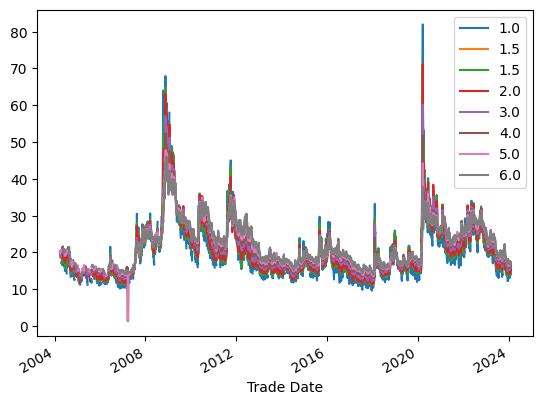

In [8]:
#plot futures
close.plot()

In [9]:
vix_spot_wide

Close                                                         \
Symbol        GVZ  LONGVOL    OVX   SHORTVOL    VIX  VIX1D  VIX3M  VIX6M   
Trade Date                                                                 
1990-01-02    NaN      NaN    NaN        NaN  17.24    NaN    NaN    NaN   
1990-01-03    NaN      NaN    NaN        NaN  18.19    NaN    NaN    NaN   
1990-01-04    NaN      NaN    NaN        NaN  19.22    NaN    NaN    NaN   
1990-01-05    NaN      NaN    NaN        NaN  20.11    NaN    NaN    NaN   
1990-01-08    NaN      NaN    NaN        NaN  20.26    NaN    NaN    NaN   
...           ...      ...    ...        ...    ...    ...    ...    ...   
2024-01-26  11.91  15.8365  34.78  2551.5211  13.26   9.47  15.03  16.86   
2024-01-29  13.08  15.9520  36.32  2532.9071  13.60   9.33  15.22  16.97   
2024-01-30  13.05  15.7049  36.19  2572.1456  13.31  14.50  15.14  16.93   
2024-01-31  13.16  16.5491  37.25  2433.8772  14.35  13.47  15.96  17.58   
2024-02-01  13.72  16.3235  35.38  2467.0549  13.88  13.91  15.50  17.22   

                          ...     Low                                    \
Symbol      VIX9D   VVIX  ... LONGVOL OVX SHORTVOL    VIX  VIX1D  VIX3M   
Trade Date                ...                                             
1990-01-02    NaN    NaN  ...     NaN NaN      NaN  17.24    NaN    NaN   
1990-01-03    NaN    NaN  ...     NaN NaN      NaN  18.19    NaN    NaN   
1990-01-04    NaN    NaN  ...     NaN NaN      NaN  19.22    NaN    NaN   
1990-01-05    NaN    NaN  ...     NaN NaN      NaN  20.11    NaN    NaN   
1990-01-08    NaN    NaN  ...     NaN NaN      NaN  20.26    NaN    NaN   
...           ...    ...  ...     ...  ..      ...    ...    ...    ...   
2024-01-26  13.07  82.20  ...     NaN NaN      NaN  13.20   8.29  14.89   
2024-01-29  13.95  83.40  ...     NaN NaN      NaN  13.59   7.06  15.19   
2024-01-30  13.72  82.24  ...     NaN NaN      NaN  13.23   8.21  15.07   
2024-01-31  14.55  87.56  ...     NaN NaN      NaN  13.18  11.80  15.14   
2024-02-01  13.28  84.83  ...     NaN NaN      NaN  13.87   9.84  15.45   

                                     
Symbol      VIX6M  VIX9D VVIX VXTLT  
Trade Date                           
1990-01-02    NaN    NaN  NaN   NaN  
1990-01-03    NaN    NaN  NaN   NaN  
1990-01-04    NaN    NaN  NaN   NaN  
1990-01-05    NaN    NaN  NaN   NaN  
1990-01-08    NaN    NaN  NaN   NaN  
...           ...    ...  ...   ...  
2024-01-26  16.74  12.95  NaN   NaN  
2024-01-29  16.94  13.88  NaN   NaN  
2024-01-30  16.86  13.62  NaN   NaN  
2024-01-31  16.97  13.51  NaN   NaN  
2024-02-01  17.22  13.22  NaN   NaN  

[8602 rows x 44 columns]

<Axes: xlabel='Trade Date'>

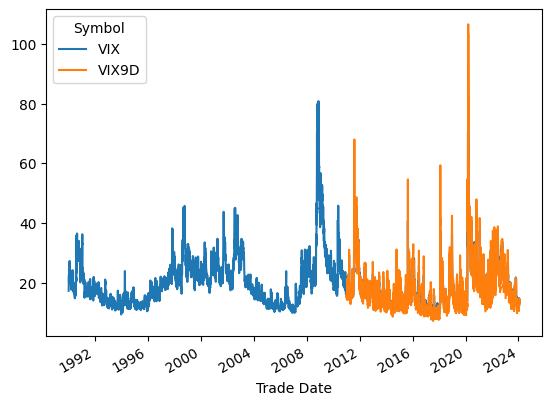

In [10]:
vix_spot_wide["Close"][["VIX","VIX9D"]].plot()

<Axes: xlabel='Trade Date'>

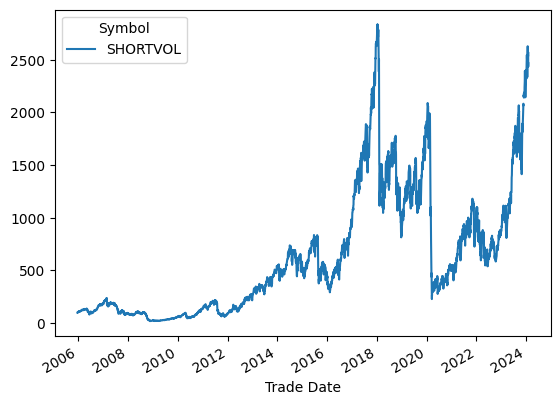

In [11]:
vix_spot_wide["Close"][["SHORTVOL"]].plot()

In [12]:
def add_column_level(df:pd.DataFrame,var_name):
        df2=pd.DataFrame(df)
        idx=df2.columns.to_frame()
        idx.insert(0,"Variable",var_name)
        df2.columns=pd.MultiIndex.from_frame(idx)
        return df2 


Compute the basis (future price - spot price) for the varous tenors and  VIX indexes. It is really only correct
to compare the VIX index since the futures are trading on the VIX, not VIX9D etc. 

In [13]:
vix_spot_history_closes=vix_spot_wide['Close']    
vix_basis_by_index=[add_column_level(close.sub(vix_spot_history_closes[spot_symbol],axis=0),spot_symbol+"_Basis") for spot_symbol in ["VIX9D","VIX","VIX3M","GVZ"]]

closes=add_column_level(close,"Futures")
vix_basis=pd.concat(chain([closes],vix_basis_by_index),axis=1,join="inner")
vix_basis 


Variable   Futures                                                       \
0              1.0      1.5      1.5    2.0    3.0    4.0    5.0    6.0   
Trade Date                                                                
2004-03-26     NaN      NaN      NaN  20.27  20.20    NaN  20.06    NaN   
2004-03-29     NaN      NaN      NaN  19.77  19.76    NaN  19.76    NaN   
2004-03-30     NaN      NaN      NaN  19.61  19.73    NaN  19.92    NaN   
2004-03-31     NaN      NaN      NaN  19.72  19.90    NaN  20.18    NaN   
2004-04-01     NaN      NaN      NaN  19.65  19.94    NaN  20.28    NaN   
...            ...      ...      ...    ...    ...    ...    ...    ...   
2024-01-26   14.14  14.6344  14.6344  15.17  15.87  16.21    NaN  17.03   
2024-01-29   14.20  14.7356  14.7356  15.23  15.91  16.25    NaN  16.96   
2024-01-30   14.10  14.6600  14.6600  15.10  15.87  16.25    NaN  17.07   
2024-01-31   14.88  15.3840  15.3840  15.72  16.41  16.71    NaN  17.47   
2024-02-01   14.39  15.0108  15.0108  15.36  16.10  16.43    NaN  17.19   

Variable   VIX9D_Basis          ... VIX3M_Basis       GVZ_Basis          \
0                  1.0     1.5  ...         5.0   6.0       1.0     1.5   
Trade Date                      ...                                       
2004-03-26         NaN     NaN  ...         NaN   NaN       NaN     NaN   
2004-03-29         NaN     NaN  ...         NaN   NaN       NaN     NaN   
2004-03-30         NaN     NaN  ...         NaN   NaN       NaN     NaN   
2004-03-31         NaN     NaN  ...         NaN   NaN       NaN     NaN   
2004-04-01         NaN     NaN  ...         NaN   NaN       NaN     NaN   
...                ...     ...  ...         ...   ...       ...     ...   
2024-01-26        1.07  1.5644  ...         NaN  2.00      2.23  2.7244   
2024-01-29        0.25  0.7856  ...         NaN  1.74      1.12  1.6556   
2024-01-30        0.38  0.9400  ...         NaN  1.93      1.05  1.6100   
2024-01-31        0.33  0.8340  ...         NaN  1.51      1.72  2.2240   
2024-02-01        1.11  1.7308  ...         NaN  1.69      0.67  1.2908   

Variable                                        
0              1.5   2.0   3.0   4.0 5.0   6.0  
Trade Date                                      
2004-03-26     NaN   NaN   NaN   NaN NaN   NaN  
2004-03-29     NaN   NaN   NaN   NaN NaN   NaN  
2004-03-30     NaN   NaN   NaN   NaN NaN   NaN  
2004-03-31     NaN   NaN   NaN   NaN NaN   NaN  
2004-04-01     NaN   NaN   NaN   NaN NaN   NaN  
...            ...   ...   ...   ...  ..   ...  
2024-01-26  2.7244  3.26  3.96  4.30 NaN  5.12  
2024-01-29  1.6556  2.15  2.83  3.17 NaN  3.88  
2024-01-30  1.6100  2.05  2.82  3.20 NaN  4.02  
2024-01-31  2.2240  2.56  3.25  3.55 NaN  4.31  
2024-02-01  1.2908  1.64  2.38  2.71 NaN  3.47  

[4996 rows x 40 columns]

In [14]:
day_of_interest='2023-07-14'
di_spot=vix_spot_history_closes.loc[day_of_interest]
di_spot


Symbol
GVZ           12.0500
LONGVOL       26.6759
OVX           30.0000
SHORTVOL    1774.0829
VIX           13.3400
VIX1D         10.1700
VIX3M         16.0400
VIX6M         18.2100
VIX9D         11.9000
VVIX          94.8900
VXTLT         14.6700
Name: 2023-07-14 00:00:00, dtype: float64

In [15]:
di_futures=vix_futures_wide.loc[[day_of_interest]]
di_futures

1.0                                                         \
            Change  Close     Expiry                           File  High   
Trade Date                                                                  
2023-07-14 -0.3875  13.77 2023-07-19  2023-07-19.w_.CFE_VX_2023.csv  14.4   

                                                   1.5  ...        5.0  \
              Low   Open   Settle Tenor_Days    Change  ... Tenor_Days   
Trade Date                                              ...              
2023-07-14  13.75  14.19  13.8048        5.0 -0.214355  ...      124.0   

               6.0                                                          \
            Change  Close     Expiry                           File   High   
Trade Date                                                                   
2023-07-14 -0.1114  18.32 2023-12-20  2023-12-20.w_.CFE_VX_2023.csv  18.57   

                                              
              Low   Open   Settle Tenor_Days  
Trade Date                                    
2023-07-14  18.21  18.43  18.3386      159.0  

[1 rows x 72 columns]

In [16]:
di_basis=vix_basis.loc[day_of_interest]
di_basis["VIX_Basis"]

0
1.0    0.430
1.5    2.113
1.5    2.113
2.0    2.410
3.0    3.710
4.0    4.330
5.0    4.740
6.0    4.980
Name: 2023-07-14 00:00:00, dtype: float64

In [17]:
cols_to_plot=[1,1.5] +  list(range(2,5))
df_day_of_interest_to_plot=di_futures.swaplevel(axis=1)[['Close',"Tenor_Days"]]

#.swaplevel(axis=1)[cols_to_plot].swaplevel()
dx=df_day_of_interest_to_plot.T
df_day_of_interest_to_plot


Close                                                     \
              1.0     1.5     1.5    2.0    3.0    4.0    5.0    6.0   
Trade Date                                                             
2023-07-14  13.77  15.453  15.453  15.75  17.05  17.67  18.08  18.32   

           Tenor_Days                                              
                  1.0   1.5   1.5   2.0   3.0   4.0    5.0    6.0  
Trade Date                                                         
2023-07-14        5.0  28.0  28.0  33.0  68.0  96.0  124.0  159.0

<Axes: xlabel='Tenor_Days', ylabel='Close'>

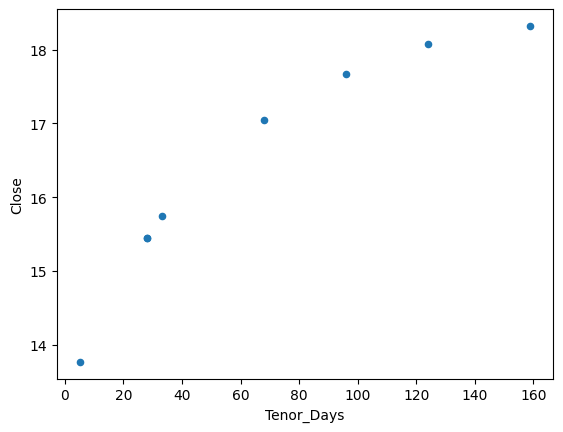

In [18]:
df_day_of_interest_to_plot.plot(x="Tenor_Days", y="Close", kind = 'scatter', use_index=True)